<center>
<h1> Credit Card Spend Prediction - Case Study
</center>

### In this module...

First, we'll load our analytical base table

Then, we'll go through the essential modeling steps:

1. [Split your dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics and select winner](#evaluate)

Finally, we'll save the best model as a project deliverable!

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

In [2]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Load the Dataset

In [3]:
cleaned_creditdata = pd.read_csv("cleaneddata_creditcard.csv")

In [4]:
cleaned_creditdata.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,employ_6.0,employ_7.0,employ_8.0,employ_9.0,employ_10.0,...,card2tenure_26.0,card2tenure_27.0,card2tenure_28.0,card2tenure_29.0,card2tenure_30.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,tollfree_1.0,wireless_1.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callwait_1.0,confer_1.0,owntv_1.0,ownvcr_1.0,owndvd_1.0,owncd_1.0,ownpda_1.0,ownfax_1.0,pager_1.0,forward_1.0,callid_1.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,equip_1.0,multline_1.0,ownpc_1.0,response_03_1.0,region_2.0,region_3.0,region_4.0,region_5.0,news_1.0,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,ln_totalcreditspend
0,20.000,14.250,60.000,14.300,22.000,1.200,11.100,15.000,29.500,126.100,13.000,31.000,0.180,3.430,1.870,3.540,0.810,6.500,34.400,2.240,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,5.000,29.000,131.940,0.000,0.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,4.890
1,22.000,16.000,610.000,6.800,29.000,1.220,18.600,17.000,54.850,878.388,18.000,15.000,0.200,2.710,2.190,5.800,0.450,8.900,330.600,1.570,6.000,0.000,0.000,0.000,6.000,0.000,0.000,0.000,2.000,0.000,39.000,0.000,0.000,45.650,878.388,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,4.364
2,67.000,23.000,622.477,18.800,24.000,0.930,9.900,14.000,0.000,0.000,21.000,35.000,0.000,3.560,3.350,7.530,0.930,28.400,622.477,2.540,3.000,0.000,2.000,1.000,0.000,0.000,0.000,0.000,3.000,13.000,65.000,0.000,0.000,0.000,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,5.889
3,23.000,21.000,239.440,8.700,38.000,0.020,5.700,16.000,0.000,0.000,26.000,20.000,0.000,3.000,1.790,5.300,0.110,6.000,199.450,1.120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,18.000,36.000,0.000,0.000,0.000,0.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,5.482
4,26.000,17.250,360.000,10.600,32.000,0.210,1.700,16.000,0.000,0.000,27.000,23.000,-0.385,3.140,1.120,4.310,-0.385,3.050,74.100,0.180,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,13.000,21.000,16.500,387.700,19.050,393.475,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,5.978


In [5]:
cleaned_creditdata.shape

(5000, 298)

<br id="split">
# 1. Split your dataset

<br>
First, let's import the <code style="color:steelblue">train_test_split()</code> function from Scikit-Learn.

In [6]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

Next, separate your dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).

In [7]:
# Create separate object for target variable
y = cleaned_creditdata.ln_totalcreditspend
# Create separate object for input features
X = cleaned_creditdata.drop('ln_totalcreditspend' , axis = 1)

In [8]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1234)

In [9]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

4000 1000 4000 1000


<br id="pipelines">
# 2. Build model pipelines

<big>
- In this data we have lot of variables, so we will use regularized regression and ensemble regression methods to aviod the effect of multicollinearity

<br>
So let's import the <code style="color:steelblue">make_pipeline()</code> function from Scikit-Learn.

In [10]:
# Function for creating model pipelines

from sklearn.pipeline import make_pipeline

Now let's import the <code style="color:steelblue">StandardScaler</code>, which is used for standardization.

In [11]:
# For standardization
from sklearn.preprocessing import StandardScaler


Next, create a <code style="color:steelblue">pipelines</code> dictionary.
* It should include 3 keys: <code style="color:crimson">'lasso'</code>, <code style="color:crimson">'ridge'</code>, and <code style="color:crimson">'enet'</code>
* The corresponding values should be pipelines that first standardize the data.
* For the algorithm in each pipeline, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [12]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [13]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler() , Lasso(random_state = 123)),
    'ridge' : make_pipeline(StandardScaler() , Ridge(random_state = 123)),
    'enet'  : make_pipeline(StandardScaler()  , ElasticNet(random_state = 123))    
}

In [14]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [15]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler()  , RandomForestRegressor(random_state = 123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler()  , GradientBoostingRegressor(random_state = 123))


<br id="hyperparameters">
# 3. Declare hyperparameters to tune

<br>
Hyperparameters for regression pipeline.

In [16]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}

In [17]:
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
    'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9] 
}

In [18]:
# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [19]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
    
}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

<br>
**Create a <code style="color:steelblue">hyperparameters</code> dictionary**.
* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
    * If you forgot what those keys were, you can insert a new code cell and call <code style="color:steelblue">pipelines.keys()</code> for a reminder.
* Set the values to the corresponding **hyperparameter grids** we've been declaring throughout this module.
    * e.g. <code style="color:steelblue"><span style="color:crimson">'rf'</span> : rf_hyperparameters</code>
    * e.g. <code style="color:steelblue"><span style="color:crimson">'lasso'</span> : lasso_hyperparameters</code>

In [20]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge'  : ridge_hyperparameters,
    'enet'     : enet_hyperparameters,
    'gb'     : gb_hyperparameters
}


**Finally, run this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.**

In [21]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<br id="fit-tune">
# 4. Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.

let's to import a helper for cross-validation called <code style="color:steelblue">GridSearchCV</code>.

In [22]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

<big>
Doing the 5 fold cross validation and finding the best hyperparameters

In [23]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline , hyperparameters[name] , cv = 5, verbose=2,n_jobs=3, return_train_score=True)
    
    # Fit model on X_train, y_train
    model.fit(X_train , y_train)
    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   10.9s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   11.6s finished


lasso has been fitted.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.7s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    8.6s finished


ridge has been fitted.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   47.0s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:   52.8s finished


enet has been fitted.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:  2.7min finished


rf has been fitted.
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.4min
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  4.1min finished


gb has been fitted.


<br>
**Run this code to check that the models have been fitted correctly.**

In [24]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


<br id="evaluate">
# 5. Evaluate models and select winner

Finally, it's time to evaluate our models and pick the best one.

<br>
Let's display the holdout $R^2$ score for each fitted model.

In [25]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print(name , model.best_score_)

lasso 0.707441960244075
ridge 0.6957916608554552
enet 0.7068549031091923
rf 0.8193139645390113
gb 0.8222867635086767


In [26]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [27]:
#R2 on test data
for name, model  in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print("----------")
    print("R^2:" , r2_score(y_test , pred))
    print("MAE: ", mean_absolute_error(y_test , pred))

lasso
----------
R^2: 0.7204625883500988
MAE:  0.3857614630028698
ridge
----------
R^2: 0.7154509605369208
MAE:  0.3879556601926902
enet
----------
R^2: 0.7203561089130319
MAE:  0.3858455036773382
rf
----------
R^2: 0.8164594757753537
MAE:  0.24844365453591555
gb
----------
R^2: 0.8234458001488404
MAE:  0.2599721399039337


#### Gradient Boost Regressor is giving the highest R-Squared Value, so we will use that model for predicting the test data

In [28]:
gradientboostmodel = fitted_models["gb"].best_estimator_.named_steps["gradientboostingregressor"]

In [29]:
mdl = fitted_models["gb"]

In [30]:
mdl.best_params_

{'gradientboostingregressor__learning_rate': 0.05,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__n_estimators': 200}

In [31]:
mdl.best_score_

0.8222867635086767

In [32]:
mdl.cv_results_["mean_test_score"]

array([0.68591599, 0.71323933, 0.80140915, 0.80681293, 0.82162589,
       0.82228676, 0.7139153 , 0.7302529 , 0.80569651, 0.80607378,
       0.82174453, 0.82055418, 0.72905302, 0.74093021, 0.80339894,
       0.80273164, 0.81239062, 0.81158795])

In [62]:
np.mean(mdl.cv_results_["mean_test_score"])

0.7805344240760926

In [33]:
gradientboostmodel

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
gradientboostmodel.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x000001B008E5C360>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x000001B008E5C360>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_

In [35]:
# Predict test set using fitted gradient boost regressor
pred = fitted_models["gb"].predict(X_test)

Finally, we use the scoring functions we imported to calculate and print $R^2$ and MAE.

In [36]:
# Calculate and print R^2 and MAE
print("R^2:" , r2_score(y_test , pred))
print("MAE: ", mean_absolute_error(y_test , pred))

R^2: 0.8234458001488404
MAE:  0.2599721399039337


In [38]:
plt.style.use("seaborn")

**Finally, let's plot the performance of the winning model on the test set.**

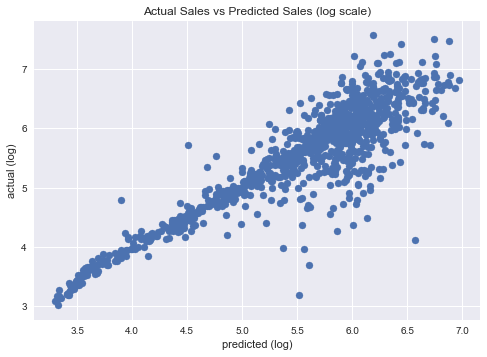

In [39]:
gb_pred = fitted_models["gb"].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted (log)')
plt.ylabel('actual (log)')
plt.title("Actual Sales vs Predicted Sales (log scale)")
plt.show()

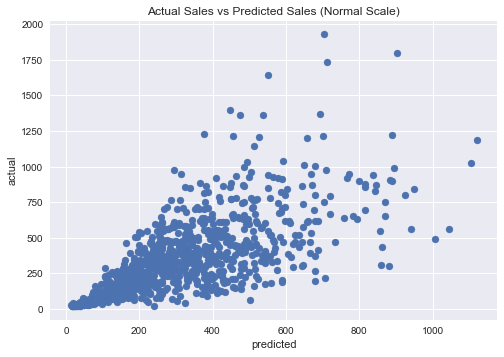

In [40]:
gb_pred = fitted_models['lasso'].predict(X_test)
plt.scatter(np.exp(gb_pred), np.exp(y_test))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Actual Sales vs Predicted Sales (Normal Scale)")
plt.show()

### Decile Analysis

In [41]:
#decile analysis for training data

train = X_train.copy()

In [42]:
train["y_pred_train"] = fitted_models["gb"].predict(X_train)

In [43]:
train["ln_totalcreditspend"] = y_train

In [44]:
train.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,employ_6.0,employ_7.0,employ_8.0,employ_9.0,employ_10.0,...,card2tenure_27.0,card2tenure_28.0,card2tenure_29.0,card2tenure_30.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,tollfree_1.0,wireless_1.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callwait_1.0,confer_1.0,owntv_1.0,ownvcr_1.0,owndvd_1.0,owncd_1.0,ownpda_1.0,ownfax_1.0,pager_1.0,forward_1.0,callid_1.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,equip_1.0,multline_1.0,ownpc_1.0,response_03_1.0,region_2.0,region_3.0,region_4.0,region_5.0,news_1.0,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,y_pred_train,ln_totalcreditspend
3700,22.000,0.000,0.000,7.600,23.750,0.050,3.200,13.000,0.000,0.000,19.000,22.000,-0.565,3.090,0.940,3.070,-0.420,2.550,21.550,0.660,12.000,0.000,0.000,1.000,11.000,0.000,0.000,0.000,2.000,-0.565,11.000,0.000,0.000,0.000,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3.412,3.209
894,53.000,15.000,618.250,-0.250,31.000,4.450,8.400,9.000,0.000,0.000,15.000,141.000,1.490,4.950,2.380,6.340,2.000,10.800,566.000,7.390,3.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.250,53.000,21.000,618.250,0.000,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,6.058,5.837
2322,60.000,14.750,900.000,55.500,36.000,2.760,5.800,20.000,42.500,1169.078,17.000,86.000,1.010,4.450,3.240,7.380,0.800,25.500,1169.078,2.230,11.000,0.000,4.000,0.000,7.000,0.000,0.000,0.000,2.000,13.000,65.000,0.000,0.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,6.475,6.931
4592,20.000,0.000,0.000,9.100,19.000,0.280,6.300,15.000,31.550,164.035,14.000,24.000,-0.250,3.180,1.850,3.730,0.210,6.350,41.800,1.230,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.250,8.000,0.000,0.000,22.850,154.700,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.058,5.106
3711,18.000,18.500,65.000,22.400,16.000,1.170,5.700,13.000,0.000,0.000,17.000,48.000,0.150,3.870,1.060,1.900,0.450,2.900,6.700,1.570,6.000,2.000,2.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,4.000,27.500,74.287,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,4.405,4.321


In [45]:
#decile analysis on test data

test = X_test.copy()

In [46]:
test["y_pred_test"] = fitted_models["gb"].predict(X_test)

In [47]:
test["ln_totalcreditspend"] = y_test

In [48]:
test.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,employ_6.0,employ_7.0,employ_8.0,employ_9.0,employ_10.0,...,card2tenure_27.0,card2tenure_28.0,card2tenure_29.0,card2tenure_30.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,tollfree_1.0,wireless_1.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callwait_1.0,confer_1.0,owntv_1.0,ownvcr_1.0,owndvd_1.0,owncd_1.0,ownpda_1.0,ownfax_1.0,pager_1.0,forward_1.0,callid_1.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,equip_1.0,multline_1.0,ownpc_1.0,response_03_1.0,region_2.0,region_3.0,region_4.0,region_5.0,news_1.0,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,y_pred_test,ln_totalcreditspend
2706,23.000,22.750,139.450,18.900,13.000,1.150,4.000,13.000,0.000,0.000,26.000,53.000,0.140,3.970,1.640,4.350,0.000,5.150,77.600,0.970,5.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,4.000,12.000,14.000,0.000,0.000,0.000,0.000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,4.658,4.945
2436,66.000,14.750,626.412,10.600,24.000,0.830,7.000,17.000,29.250,626.412,13.000,31.000,-0.045,3.430,2.280,6.340,0.290,9.800,568.550,1.340,4.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,1.000,-0.045,51.000,0.000,0.000,0.000,0.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5.860,5.851
1201,71.000,43.500,926.760,5.500,25.000,0.600,17.000,13.000,0.000,0.000,23.000,12.000,0.000,2.480,3.770,8.060,0.360,43.300,926.760,1.440,5.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,5.000,10.000,72.000,0.000,0.000,0.000,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,5.484,5.401
1486,61.000,0.000,0.000,10.600,21.000,0.470,10.500,19.000,35.050,276.188,12.000,22.000,-0.190,3.090,1.450,4.340,0.610,4.250,76.850,1.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.190,16.000,12.000,167.250,0.000,0.000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,5.474,5.625
4286,55.000,24.500,1430.000,80.300,16.000,1.050,4.200,16.000,40.550,2358.700,20.000,380.000,0.050,5.940,2.690,6.860,2.700,14.800,955.200,14.910,5.000,0.000,1.000,0.000,4.000,0.000,0.000,0.000,2.000,13.000,61.000,44.500,2430.912,56.700,2430.912,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,6.657,6.619


In [49]:
train['Deciles']=pd.qcut(train['y_pred_train'],10, labels=False)
test['Deciles']=pd.qcut(test['y_pred_test'],10, labels=False)

In [50]:
train.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,employ_6.0,employ_7.0,employ_8.0,employ_9.0,employ_10.0,...,card2tenure_28.0,card2tenure_29.0,card2tenure_30.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,tollfree_1.0,wireless_1.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callwait_1.0,confer_1.0,owntv_1.0,ownvcr_1.0,owndvd_1.0,owncd_1.0,ownpda_1.0,ownfax_1.0,pager_1.0,forward_1.0,callid_1.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,equip_1.0,multline_1.0,ownpc_1.0,response_03_1.0,region_2.0,region_3.0,region_4.0,region_5.0,news_1.0,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,y_pred_train,ln_totalcreditspend,Deciles
3700,22.000,0.000,0.000,7.600,23.750,0.050,3.200,13.000,0.000,0.000,19.000,22.000,-0.565,3.090,0.940,3.070,-0.420,2.550,21.550,0.660,12.000,0.000,0.000,1.000,11.000,0.000,0.000,0.000,2.000,-0.565,11.000,0.000,0.000,0.000,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3.412,3.209,0
894,53.000,15.000,618.250,-0.250,31.000,4.450,8.400,9.000,0.000,0.000,15.000,141.000,1.490,4.950,2.380,6.340,2.000,10.800,566.000,7.390,3.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.250,53.000,21.000,618.250,0.000,0.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,6.058,5.837,7
2322,60.000,14.750,900.000,55.500,36.000,2.760,5.800,20.000,42.500,1169.078,17.000,86.000,1.010,4.450,3.240,7.380,0.800,25.500,1169.078,2.230,11.000,0.000,4.000,0.000,7.000,0.000,0.000,0.000,2.000,13.000,65.000,0.000,0.000,0.000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,6.475,6.931,9
4592,20.000,0.000,0.000,9.100,19.000,0.280,6.300,15.000,31.550,164.035,14.000,24.000,-0.250,3.180,1.850,3.730,0.210,6.350,41.800,1.230,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.250,8.000,0.000,0.000,22.850,154.700,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5.058,5.106,2
3711,18.000,18.500,65.000,22.400,16.000,1.170,5.700,13.000,0.000,0.000,17.000,48.000,0.150,3.870,1.060,1.900,0.450,2.900,6.700,1.570,6.000,2.000,2.000,2.000,0.000,0.000,0.000,0.000,1.000,0.000,4.000,27.500,74.287,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,4.405,4.321,1


In [51]:
test.head()

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,hourstv,income,lncreddebt,lninc,lnlongmon,lnlongten,lnothdebt,longmon,longten,othdebt,pets,pets_birds,pets_cats,pets_dogs,pets_freshfish,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten,gender_1.0,edcat_2.0,edcat_3.0,edcat_4.0,edcat_5.0,employ_1.0,employ_2.0,employ_3.0,employ_4.0,employ_5.0,employ_6.0,employ_7.0,employ_8.0,employ_9.0,employ_10.0,...,card2tenure_28.0,card2tenure_29.0,card2tenure_30.0,card2tenurecat_2.0,card2tenurecat_3.0,card2tenurecat_4.0,card2tenurecat_5.0,tollfree_1.0,wireless_1.0,internet_1.0,internet_2.0,internet_3.0,internet_4.0,callwait_1.0,confer_1.0,owntv_1.0,ownvcr_1.0,owndvd_1.0,owncd_1.0,ownpda_1.0,ownfax_1.0,pager_1.0,forward_1.0,callid_1.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,equip_1.0,multline_1.0,ownpc_1.0,response_03_1.0,region_2.0,region_3.0,region_4.0,region_5.0,news_1.0,spousedcat_1.0,spousedcat_2.0,spousedcat_3.0,spousedcat_4.0,spousedcat_5.0,commutebike_1.0,ownipod_1.0,voice_1.0,callcard_1.0,card2fee_1.0,y_pred_test,ln_totalcreditspend,Deciles
2706,23.000,22.750,139.450,18.900,13.000,1.150,4.000,13.000,0.000,0.000,26.000,53.000,0.140,3.970,1.640,4.350,0.000,5.150,77.600,0.970,5.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,4.000,12.000,14.000,0.000,0.000,0.000,0.000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,4.658,4.945,1
2436,66.000,14.750,626.412,10.600,24.000,0.830,7.000,17.000,29.250,626.412,13.000,31.000,-0.045,3.430,2.280,6.340,0.290,9.800,568.550,1.340,4.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,1.000,-0.045,51.000,0.000,0.000,0.000,0.000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,5.860,5.851,5
1201,71.000,43.500,926.760,5.500,25.000,0.600,17.000,13.000,0.000,0.000,23.000,12.000,0.000,2.480,3.770,8.060,0.360,43.300,926.760,1.440,5.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,5.000,10.000,72.000,0.000,0.000,0.000,0.000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,5.484,5.401,3
1486,61.000,0.000,0.000,10.600,21.000,0.470,10.500,19.000,35.050,276.188,12.000,22.000,-0.190,3.090,1.450,4.340,0.610,4.250,76.850,1.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,-0.190,16.000,12.000,167.250,0.000,0.000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,5.474,5.625,3
4286,55.000,24.500,1430.000,80.300,16.000,1.050,4.200,16.000,40.550,2358.700,20.000,380.000,0.050,5.940,2.690,6.860,2.700,14.800,955.200,14.910,5.000,0.000,1.000,0.000,4.000,0.000,0.000,0.000,2.000,13.000,61.000,44.500,2430.912,56.700,2430.912,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,6.657,6.619,9


In [52]:
train[['Deciles','ln_totalcreditspend', 'y_pred_train']].groupby(train.Deciles).mean()

,Deciles,ln_totalcreditspend,y_pred_train
Deciles,,,
0,0,3.572,3.623
1,1,4.281,4.311
2,2,4.845,4.905
3,3,5.278,5.340
4,4,5.564,5.589
5,5,5.734,5.779
6,6,5.955,5.939
7,7,6.117,6.091
8,8,6.327,6.268


In [53]:
test[['Deciles','ln_totalcreditspend', 'y_pred_test']].groupby(test.Deciles).mean()

,Deciles,ln_totalcreditspend,y_pred_test
Deciles,,,
0,0,3.638,3.667
1,1,4.453,4.446
2,2,5.023,5.007
3,3,5.414,5.397
4,4,5.644,5.628
5,5,5.838,5.807
6,6,5.951,5.937
7,7,6.045,6.056
8,8,6.226,6.216


<br>
### Finally, let's save the winning model.

In [54]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, m...rs=200, presort='auto', random_state=123,
             subsample=1.0, verbose=0, warm_start=False))])

- Taking the gradient boost model

In [55]:
#save the final gradient boosting regressor model

winning_model = fitted_models["gb"].best_estimator_.named_steps["gradientboostingregressor"]

In [56]:
plt.style.use("seaborn")

In [57]:
plt.rcParams["figure.figsize"] = (10,8)

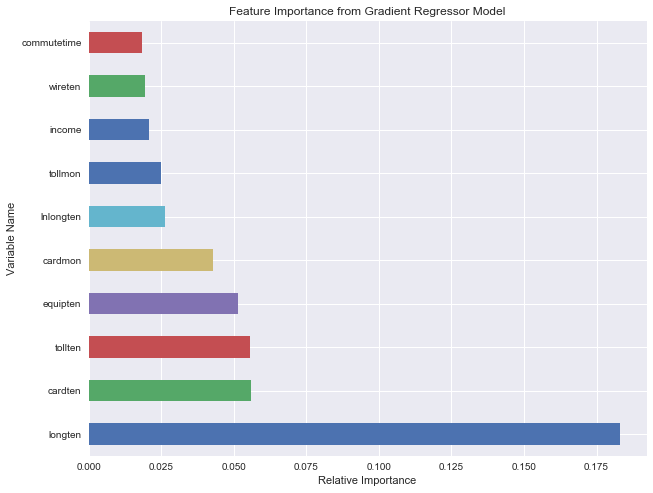

In [59]:
feat_importances = pd.Series(winning_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.title("Feature Importance from Gradient Regressor Model")
plt.xlabel("Relative Importance")
plt.ylabel("Variable Name")
plt.show()

### Key Factors driving the credit card spend

<big>
    1. longten	Long distance over tenure
    2. cardten
    3. tollten	Toll-free over tenure
    4. equipten

In [60]:
import pickle

Let's save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [61]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(winning_model, f)